In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

D:\anaconda\envs\toursky\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda\envs\toursky\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\anaconda\envs\toursky\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# 一、数据预处理及可视化

## 1.数据读取

In [2]:
data = pd.read_csv('startupdata.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [4]:
describe = data.describe()

In [5]:
#去掉我们不关心的变量：如序号，id，公司名，公司建立时间，城市（太多且我们保留了州的信息），邮编
data.drop(['Unnamed: 0','id','object_id','name','founded_at','first_funding_at','last_funding_at','state_code.1','city','zip_code'],axis=1,inplace=True)

## 2.数据可视化

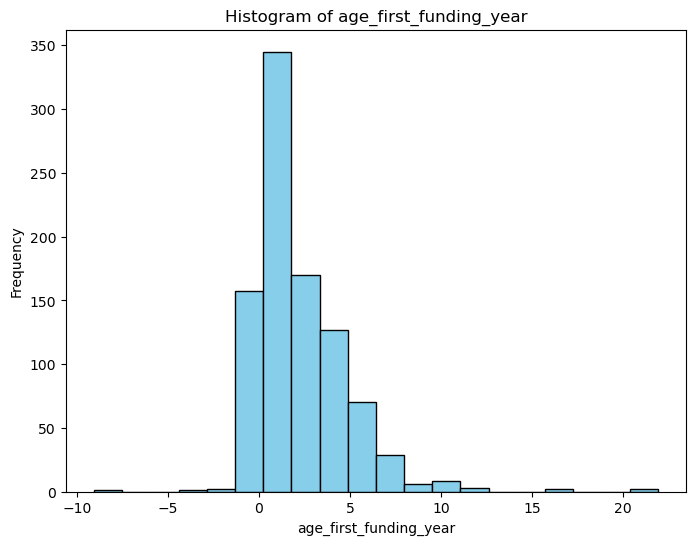

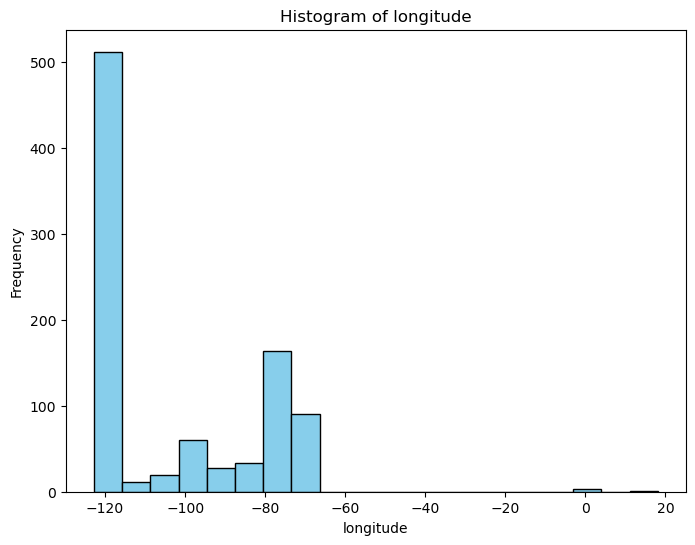

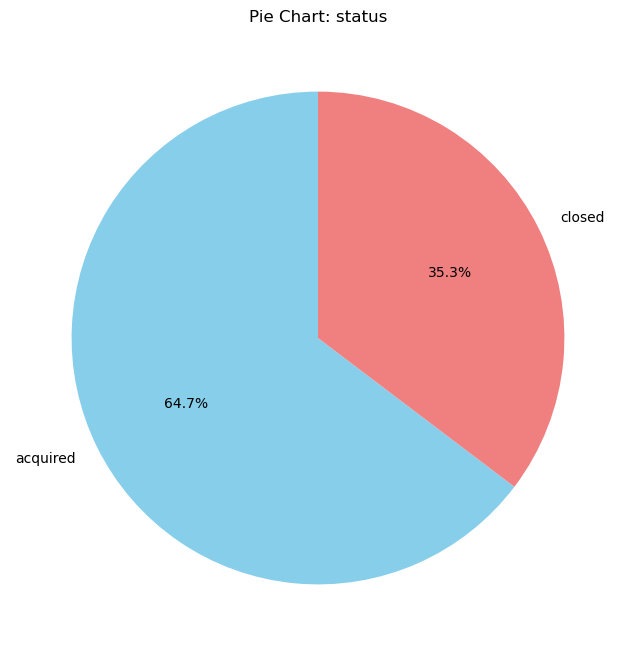

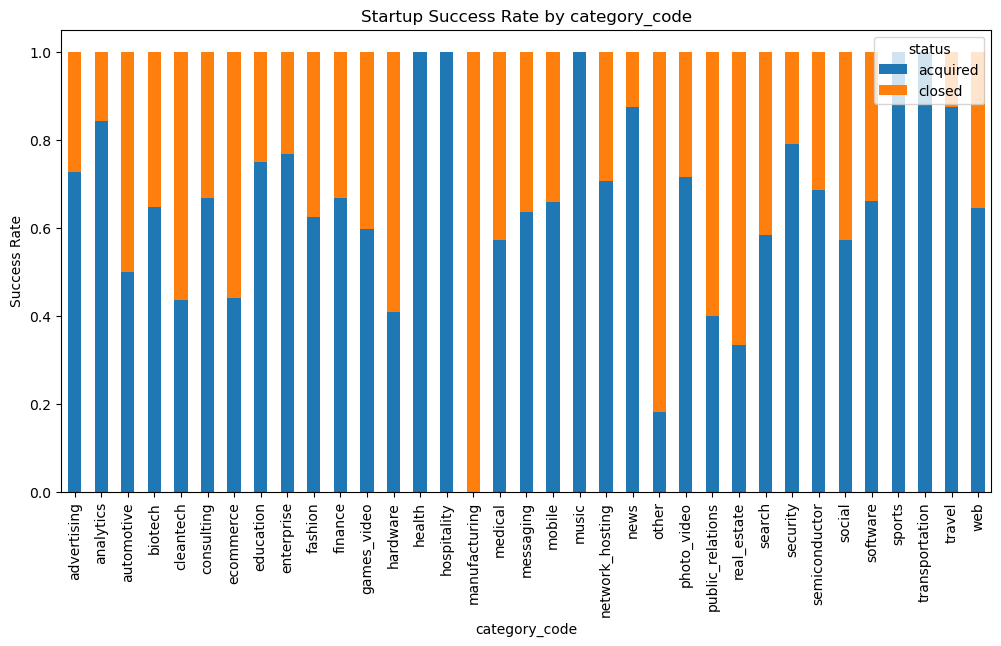

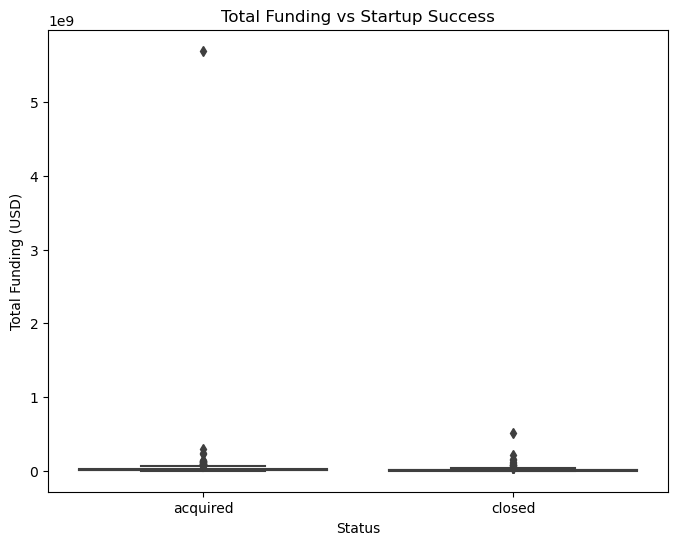

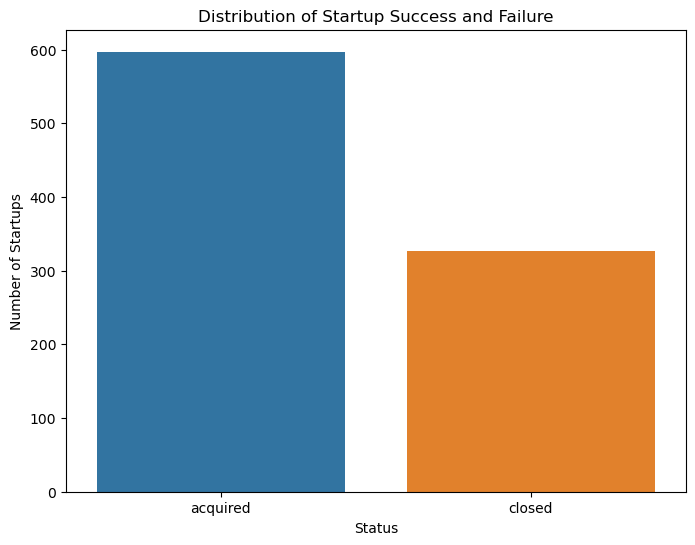

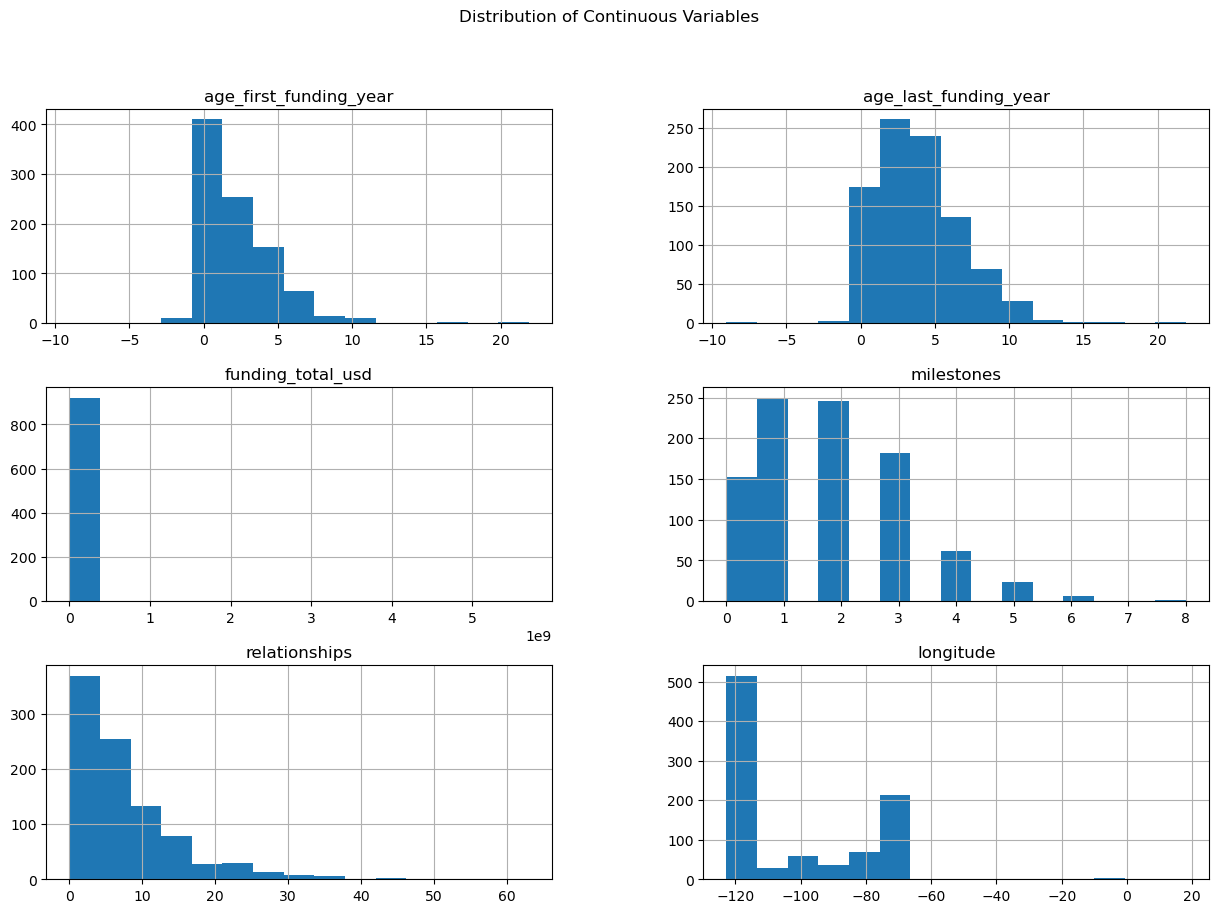

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class DataFrameVisualizer:
    def __init__(self, dataframe):
        if not isinstance(dataframe, pd.DataFrame):
            raise ValueError("输入必须是一个pandas DataFrame")
        
        self.dataframe = dataframe

    def plot_histogram(self, column):
        plt.figure(figsize=(8, 6))
        self.dataframe[column].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

    def plot_scatter(self, x_column, y_column):
        plt.figure(figsize=(8, 6))
        plt.scatter(self.dataframe[x_column], self.dataframe[y_column], color='coral', alpha=0.7)
        plt.title(f'Scatter Plot: {x_column} vs {y_column}')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.show()

    def plot_line(self, x_column, y_column):
        plt.figure(figsize=(8, 6))
        self.dataframe.plot(x=x_column, y=y_column, kind='line', marker='o', color='green')
        plt.title(f'Line Plot: {y_column} over {x_column}')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.show()

    def plot_pie(self, column):
        plt.figure(figsize=(8, 8))
        self.dataframe[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
        plt.title(f'Pie Chart: {column}')
        plt.ylabel('')
        plt.show()


    def plot_success_distribution(self):
        success_counts = self.dataframe['status'].value_counts()
        plt.figure(figsize=(8, 6))
        sns.barplot(x=success_counts.index, y=success_counts.values)
        plt.title('Distribution of Startup Success and Failure')
        plt.xlabel('Status')
        plt.ylabel('Number of Startups')
        plt.show()

    def plot_funding_vs_success(self):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='status', y='funding_total_usd', data=self.dataframe)
        plt.title('Total Funding vs Startup Success')
        plt.xlabel('Status')
        plt.ylabel('Total Funding (USD)')
        plt.show()

    def plot_category_vs_success(self,column):
        category_success = pd.crosstab(self.dataframe[column], self.dataframe['status'])
        category_success_percentage = category_success.div(category_success.sum(1), axis=0)
        category_success_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))
        plt.title('Startup Success Rate by {}'.format(column))
        plt.xlabel(column)
        plt.ylabel('Success Rate')
        plt.show()
    def plot_continuous_variables_distribution(self):
    
        continuous_vars = ['age_first_funding_year', 'age_last_funding_year', 'funding_total_usd', 'milestones', 'relationships','longitude']
        self.dataframe[continuous_vars].hist(bins=15, figsize=(15, 10))
        plt.suptitle('Distribution of Continuous Variables')
        plt.show()

visualizer = DataFrameVisualizer(data)
visualizer.plot_histogram('age_first_funding_year')
visualizer.plot_histogram('longitude')
visualizer.plot_pie('status')
visualizer.plot_category_vs_success('category_code')
visualizer.plot_funding_vs_success()
visualizer.plot_success_distribution()
visualizer.plot_continuous_variables_distribution()

## 3.空缺值填充

In [193]:
#处理空缺值
import pandas as pd

def process_null(df):
    # 用于存储将被删除的列
    droped_c = []
    # 用于存储将被填充的列
    fill_c = []

    # 遍历DataFrame的每一列
    for column in df.columns:
        # 统计当前列的缺失值数量
        null_count = df[column].isnull().sum()
        total_rows, _ = df.shape
        # 计算当前列的缺失值比例
        null_percentage = null_count / total_rows

        # 缺失值比例大于等于0.5的列，删除该列
        if null_percentage >= 0.5:
            droped_c.append(column)
        # 缺失值比例在0.1到0.5之间的列，使用均值填充缺失值
        elif 0.1 <= null_percentage < 0.5:
            df[column].fillna(df[column].mean(), inplace=True)
            fill_c.append(column)
        # 缺失值比例在0到0.1之间的列，删除含有缺失值的行
        elif 0 < null_percentage < 0.1:
            print(f"处理缺失值较少的列: {column}")
            index_to_drop = df[df[column].isna()].index.item()
            df.drop(index_to_drop, axis=0, inplace=True)

    # 删除所有缺失值比例大于等于0.5的列
    df.drop(droped_c, axis=1, inplace=True)

    print('填充的列:', fill_c)
    print('删除的列:', droped_c)
    
    return df


In [194]:
data = process_null(data)

填充的列: ['age_first_milestone_year', 'age_last_milestone_year']
删除的列: ['Unnamed: 6', 'closed_at']


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    object 
 1   latitude                  923 non-null    float64
 2   longitude                 923 non-null    float64
 3   labels                    923 non-null    int64  
 4   age_first_funding_year    923 non-null    float64
 5   age_last_funding_year     923 non-null    float64
 6   age_first_milestone_year  923 non-null    float64
 7   age_last_milestone_year   923 non-null    float64
 8   relationships             923 non-null    int64  
 9   funding_rounds            923 non-null    int64  
 10  funding_total_usd         923 non-null    int64  
 11  milestones                923 non-null    int64  
 12  is_CA                     923 non-null    int64  
 13  is_NY                     923 non-null    int64  
 14  is_MA     

## 4.异常值检测与去除

In [196]:
def outliner_box(df,columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # 标识异常值的阈值
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
    

In [197]:
data = outliner_box(data,['longitude','latitude','age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd'])

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 922
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                720 non-null    object 
 1   latitude                  720 non-null    float64
 2   longitude                 720 non-null    float64
 3   labels                    720 non-null    int64  
 4   age_first_funding_year    720 non-null    float64
 5   age_last_funding_year     720 non-null    float64
 6   age_first_milestone_year  720 non-null    float64
 7   age_last_milestone_year   720 non-null    float64
 8   relationships             720 non-null    int64  
 9   funding_rounds            720 non-null    int64  
 10  funding_total_usd         720 non-null    int64  
 11  milestones                720 non-null    int64  
 12  is_CA                     720 non-null    int64  
 13  is_NY                     720 non-null    int64  
 14  is_MA     

In [199]:
def columns_with_negatives(df):
    # 确保输入是一个pandas DataFrame
    if not isinstance(df, pd.DataFrame):
        raise ValueError("输入必须是一个pandas DataFrame")

    # 初始化包含负数列名的列表
    negative_columns = []

    # 遍历每一列
    for column in df.select_dtypes(include=np.number).columns:
        # 检查列中是否存在负数
        if (df[column] < 0).any():
            negative_columns.append(column)

    return negative_columns


columns_with_negatives(data)

def remove_rows_with_negatives(dataframe, columns_to_check):
    # 确保输入是一个pandas DataFrame
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("输入必须是一个pandas DataFrame")
    
    # 确保指定的列名存在于DataFrame中
    invalid_columns = set(columns_to_check) - set(dataframe.columns)
    if invalid_columns:
        raise ValueError(f"列名 {invalid_columns} 不存在于DataFrame中")

    # 遍历指定的列名
    for column in columns_to_check:
        # 检查列中是否存在负数
        negative_rows = dataframe[dataframe[column] < 0].index
        # 删除包含负数的行
        dataframe.drop(negative_rows, inplace=True)

    return dataframe

data = remove_rows_with_negatives(data,['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year'])

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 0 to 922
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                654 non-null    object 
 1   latitude                  654 non-null    float64
 2   longitude                 654 non-null    float64
 3   labels                    654 non-null    int64  
 4   age_first_funding_year    654 non-null    float64
 5   age_last_funding_year     654 non-null    float64
 6   age_first_milestone_year  654 non-null    float64
 7   age_last_milestone_year   654 non-null    float64
 8   relationships             654 non-null    int64  
 9   funding_rounds            654 non-null    int64  
 10  funding_total_usd         654 non-null    int64  
 11  milestones                654 non-null    int64  
 12  is_CA                     654 non-null    int64  
 13  is_NY                     654 non-null    int64  
 14  is_MA     

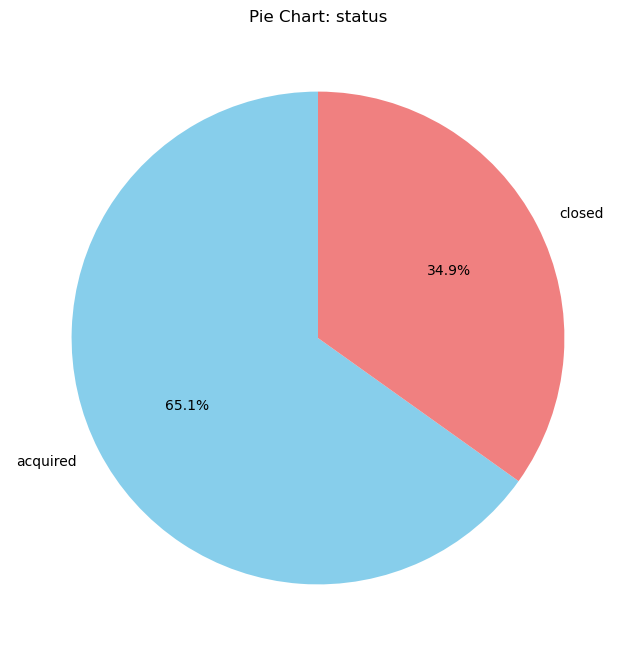

In [201]:
# 检验异常值去除后比例不变
visualizer = DataFrameVisualizer(data)
visualizer.plot_pie('status')

## 5.独热编码处理

In [213]:
def code_futures(df,hot_code=True):
    if hot_code == True:
        df = df.drop(['state_code','category_code','is_otherstate','is_othercategory','status'],axis=1)
       
    else:
        df = df.drop(['is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory','status'],axis=1)
        Le=LabelEncoder()

        
        df['state_code']=Le.fit_transform(df['state_code'])
        df['category_code']=Le.fit_transform(df['category_code'])
    return df



# 二、逻辑回归探究影响因素

In [204]:
#在逻辑回归中，使用独热编码
data1 = code_futures(data,hot_code=True)

In [205]:
data1.columns

Index(['latitude', 'longitude', 'labels', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC',
       'has_roundD', 'avg_participants', 'is_top500'],
      dtype='object')

In [206]:
from sklearn.preprocessing import StandardScaler
scale_columns = ['latitude', 'longitude',  'age_first_funding_year',
    'age_last_funding_year', 'age_first_milestone_year',
    'age_last_milestone_year', 'relationships', 'funding_rounds',
    'funding_total_usd', 'milestones', 'avg_participants']
def standardize_columns(data, column_names):
    scaler = StandardScaler()
    data[column_names] = scaler.fit_transform(data[column_names])
    return data
df_scale = standardize_columns(data1,scale_columns)

In [207]:
df_scale

,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,is_biotech,is_consulting,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1.461968,1.486159,1,0.086981,-0.231329,0.986893,1.069577,-0.641293,0.655677,-0.958963,...,0,0,0,1,0,0,0,0,-0.945606,0
1,-0.487980,-0.858114,1,1.606256,2.770586,2.233307,1.205714,0.267823,1.446844,1.999368,...,0,0,1,0,0,1,1,1,0.996497,1
2,-2.140065,-0.637989,1,-0.555437,-1.076720,-0.725660,-0.962356,-0.338254,-0.926658,-0.793266,...,0,0,0,0,1,0,0,0,0.608076,1
3,-0.456981,-0.861628,1,0.552899,0.761098,1.698474,0.752768,-0.338254,0.655677,1.991921,...,0,0,0,0,0,1,1,1,0.262796,1
4,-0.282181,-0.878626,0,-1.100944,-0.803935,-1.482522,-1.941195,-0.792812,-0.135490,-0.890078,...,0,0,1,1,0,0,0,0,-0.945606,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,0.846539,1.351367,1,-1.100944,0.166131,0.051735,0.631492,1.328458,0.655677,0.353576,...,0,0,1,0,1,1,0,0,-0.255098,1
918,-0.296915,-0.876657,1,-0.827478,-1.297788,-1.193239,0.085770,0.267823,-0.926658,-0.904972,...,0,0,0,0,1,0,0,0,1.643865,1
919,1.517549,1.479769,0,2.729115,2.440163,1.698474,0.752768,-0.944331,0.655677,2.885564,...,0,0,1,0,0,1,0,0,-0.082432,1
921,-0.366939,-0.872602,1,-0.700145,-0.304203,-1.098251,-0.226070,0.722381,-0.135490,0.167400,...,0,0,0,0,1,1,0,0,-0.945606,1


In [210]:
#搭建逻辑回归模型
import statsmodels.api as sm
class LogisticRegressionModel:
    def __init__(self, data, target, features):

        self.data = data
        self.target = target
        self.features = features
        self.model = None

    def fit_model(self):
        X = self.data[self.features]
        X = sm.add_constant(X)  #
        y = self.data[self.target]

        self.model = sm.Logit(y, X).fit()

    def print_model_summary(self):
        try:
            print(self.model.summary())
        except:
            print("Model is not fitted yet.")
            
    def get_reg_result(self):
        coef_df = pd.DataFrame({"params": self.model.params,  
                                "std err": self.model.bse,     
                                "t": round(self.model.tvalues,3),      
                                "p-values": round(self.model.pvalues,3) 
                                })

        coef_df[['coef_0.025','coef_0.975']] = self.model.conf_int()
        # coef_df.to_csv('dd.csv')

In [211]:
# 假设 'startup_data' 是包含初创公司数据的 DataFrame，'status' 是目标变量（已转换为二进制），'features' 是特征列名的列表。
logistic_model = LogisticRegressionModel(df_scale, 'labels', ['latitude', 'longitude', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC',
       'has_roundD', 'avg_participants', 'is_top500'])
logistic_model.fit_model()
logistic_model.print_model_summary()
logistic_model.get_reg_result()

Optimization terminated successfully.
         Current function value: 0.489273
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 labels   No. Observations:                  654
Model:                          Logit   Df Residuals:                      622
Method:                           MLE   Df Model:                           31
Date:                Sun, 07 Jan 2024   Pseudo R-squ.:                  0.2433
Time:                        15:27:52   Log-Likelihood:                -319.98
converged:                       True   LL-Null:                       -422.87
Covariance Type:            nonrobust   LLR p-value:                 1.088e-27
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0534      0.511      0.104      0.917      -0.948

# 三、预测模型搭建

In [230]:
#在预测模型中，不使用独热编码
data2 = code_futures(data,hot_code=False)
scale_columns.append('state_code')
scale_columns.append('category_code')
df_scale2 = standardize_columns(data2,scale_columns)

In [240]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


class BinaryClassificationModel:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        self.models = {
            'RandomForest': RandomForestClassifier(),
            'DecisionTree': DecisionTreeClassifier(),
            'GradientBoosting': GradientBoostingClassifier(),
            'SVM': SVC(),
            'LogisticRegression': LogisticRegression(),
            'NaiveBayes': GaussianNB()
        }

    def k_fold_cross_validation(self, k=5):
        for name, model in self.models.items():
            print(f"Model: {name}")

            param_grid = self.get_parameter_grid(name)
            grid_search = GridSearchCV(model, param_grid, cv=k, scoring='accuracy')
            grid_search.fit(self.X, self.y)

            best_params = grid_search.best_params_
            best_model = grid_search.best_estimator_

            kf = KFold(n_splits=k, shuffle=True, random_state=42)
            cv_scores = cross_val_score(best_model, self.X, self.y, cv=kf, scoring='accuracy')

            print(f"Best parameters: {best_params}")
            print(f"Cross-validation scores: {cv_scores}")
            print(f"Average accuracy: {cv_scores.mean()}")


            best_model.fit(self.X_train, self.y_train)
            y_pred = best_model.predict(self.X_test)


            self.calculate_and_print_metrics(self.y_test, y_pred)

    def get_parameter_grid(self, model_name):

        param_grid = {
            'RandomForest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
            'DecisionTree': {'max_depth': [None, 10, 20]},
            'GradientBoosting': {'n_estimators': [10, 50, 100], 'learning_rate': [0.01, 0.1, 0.2]},
            'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
            'LogisticRegression': {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
            'NaiveBayes': {}
        }
        return param_grid.get(model_name, {})

    def calculate_and_print_metrics(self, y_true, y_pred):
        # Calculate and print metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        confusion = confusion_matrix(y_true, y_pred)

        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print(f"Confusion Matrix:\n{confusion}\n")
    
    def get_results_dataframe(self, k=5):
        '''
        将最佳模型的效果输出dataframe
        '''
        results = []

        for name, model in self.models.items():

            param_grid = self.get_parameter_grid(name)
            grid_search = GridSearchCV(model, param_grid, cv=k, scoring='accuracy')
            grid_search.fit(self.X, self.y)

            best_params = grid_search.best_params_
            best_model = grid_search.best_estimator_

          
            kf = KFold(n_splits=k, shuffle=True, random_state=42)  
            cv_scores = cross_val_score(best_model, self.X, self.y, cv=kf, scoring='accuracy')

         
            avg_accuracy = cv_scores.mean()
            avg_f1 = cross_val_score(best_model, self.X, self.y, cv=kf, scoring='f1').mean()
            avg_recall = cross_val_score(best_model, self.X, self.y, cv=kf, scoring='recall').mean()

            
            results.append({
                'Model': name,
                'Best Parameters': best_params,
                'Average Accuracy': avg_accuracy,
                'Average F1 Score': avg_f1,
                'Average Recall': avg_recall
            })

      
        results_df = pd.DataFrame(results)
        return results_df

In [239]:
df_scale2

,state_code,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,-0.725233,1.461968,1.486159,1,0.086981,-0.231329,0.986893,1.069577,-0.641293,0.655677,...,0.913431,-0.012879,0,1,0,0,0,0,-0.945606,0
1,-0.725233,-0.487980,-0.858114,1,1.606256,2.770586,2.233307,1.205714,0.267823,1.446844,...,-0.612454,-0.968082,1,0,0,1,1,1,0.996497,1
2,-0.725233,-2.140065,-0.637989,1,-0.555437,-1.076720,-0.725660,-0.962356,-0.338254,-0.926658,...,0.150489,1.202833,0,0,1,0,0,0,0.608076,1
3,-0.725233,-0.456981,-0.861628,1,0.552899,0.761098,1.698474,0.752768,-0.338254,0.655677,...,-0.612454,0.942323,0,0,0,1,1,1,0.262796,1
4,-0.725233,-0.282181,-0.878626,0,-1.100944,-0.803935,-1.482522,-1.941195,-0.792812,-0.135490,...,-0.612454,-0.707572,1,1,0,0,0,0,-0.945606,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,1.490099,0.846539,1.351367,1,-1.100944,0.166131,0.051735,0.631492,1.328458,0.655677,...,0.913431,-1.662774,1,0,1,1,0,0,-0.255098,1
918,-0.725233,-0.296915,-0.876657,1,-0.827478,-1.297788,-1.193239,0.085770,0.267823,-0.926658,...,0.150489,-1.662774,0,0,1,0,0,0,1.643865,1
919,0.271666,1.517549,1.479769,0,2.729115,2.440163,1.698474,0.752768,-0.944331,0.655677,...,-0.612454,0.681813,1,0,0,1,0,0,-0.082432,1
921,-0.725233,-0.366939,-0.872602,1,-0.700145,-0.304203,-1.098251,-0.226070,0.722381,-0.135490,...,0.150489,0.942323,0,0,1,1,0,0,-0.945606,1


In [241]:
y = df_scale2['labels']
X = df_scale2.drop(['labels'],axis=1)
model_instance = BinaryClassificationModel(X, y)

model_instance.k_fold_cross_validation(k=5)
res = model_instance.get_results_dataframe()

Model: RandomForest
Best parameters: {'max_depth': 10, 'n_estimators': 50}
Cross-validation scores: [0.75572519 0.82442748 0.72519084 0.80916031 0.77692308]
Average accuracy: 0.778285378743394
Accuracy: 0.7938931297709924
Precision: 0.7938144329896907
Recall: 0.9166666666666666
F1 Score: 0.850828729281768
Confusion Matrix:
[[27 20]
 [ 7 77]]

Model: DecisionTree
Best parameters: {'max_depth': 10}
Cross-validation scores: [0.71755725 0.67938931 0.6870229  0.70229008 0.67692308]
Average accuracy: 0.692636523781562
Accuracy: 0.7404580152671756
Precision: 0.7717391304347826
Recall: 0.8452380952380952
F1 Score: 0.8068181818181818
Confusion Matrix:
[[26 21]
 [13 71]]

Model: GradientBoosting
Best parameters: {'learning_rate': 0.2, 'n_estimators': 10}
Cross-validation scores: [0.75572519 0.77862595 0.73282443 0.81679389 0.79230769]
Average accuracy: 0.7752554315913095
Accuracy: 0.7633587786259542
Precision: 0.7731958762886598
Recall: 0.8928571428571429
F1 Score: 0.8287292817679559
Confusion M

In [244]:
res.to_csv('res.csv')